<a href="https://colab.research.google.com/github/ss0610/NoLimitCpp/blob/main/Customer_churn_model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Import libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import warnings
warnings.filterwarnings("ignore")

Read dataset

In [2]:
df = pd.read_csv('/content/WA_Fn-UseC_-Telco-Customer-Churn.csv')

Data Cleaning

In [3]:
# Drop customerID
df.drop('customerID', axis=1, inplace=True)

# Replace 'No internet service' with 'No' in specific columns
cols_to_replace = ['OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies']
for col in cols_to_replace:
    df[col] = df[col].replace({'No internet service': 'No'})

# Replace 'No phone service' with 'No' in 'MultipleLines'
df['MultipleLines'] = df['MultipleLines'].replace({'No phone service': 'No'})

# Convert TotalCharges to numeric and handle errors
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')
df['TotalCharges'].fillna(df['TotalCharges'].median(), inplace=True)

# Encode target variable
df['Churn'] = df['Churn'].map({'Yes':1, 'No':0})

# One-hot encode categorical variables
df_encoded = pd.get_dummies(df.drop('Churn', axis=1), drop_first=True)
df_encoded['Churn'] = df['Churn']


Train-Test Split

In [4]:
X = df_encoded.drop('Churn', axis=1)
y = df_encoded['Churn']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

Feature Scaling

In [5]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

Model Training

In [6]:
gb_model = GradientBoostingClassifier(random_state=42)
gb_model.fit(X_train_scaled, y_train)

GradientBoostingClassifier(random_state=42)

Model Evaluation

In [9]:
y_pred = gb_model.predict(X_test_scaled)
print("Accuracy Score:", accuracy_score(y_test, y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

Accuracy Score: 0.7984386089425124

Confusion Matrix:
 [[933 102]
 [182 192]]

Classification Report:
               precision    recall  f1-score   support

           0       0.84      0.90      0.87      1035
           1       0.65      0.51      0.57       374

    accuracy                           0.80      1409
   macro avg       0.74      0.71      0.72      1409
weighted avg       0.79      0.80      0.79      1409



Hyperparameter Tuning with Grid Search

In [8]:
param_grid = {
    'n_estimators': [100, 150],
    'learning_rate': [0.05, 0.1],
    'max_depth': [3, 4],
}
grid = GridSearchCV(GradientBoostingClassifier(random_state=42), param_grid, cv=5, scoring='accuracy')
grid.fit(X_train_scaled, y_train)

print("\nBest Parameters:", grid.best_params_)
best_model = grid.best_estimator_


Best Parameters: {'learning_rate': 0.05, 'max_depth': 4, 'n_estimators': 100}


Feature Importance Plot

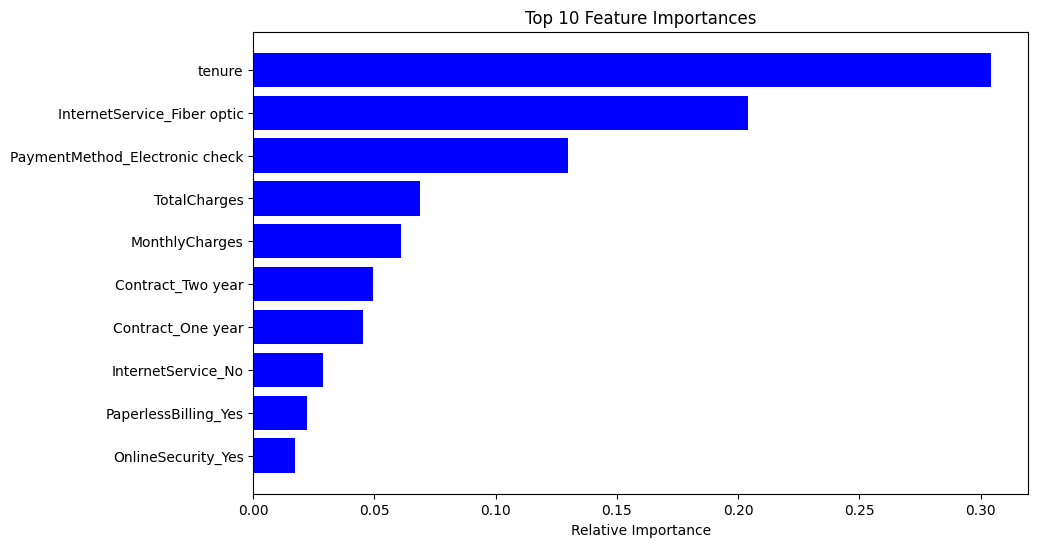

In [10]:
importances = best_model.feature_importances_
features = X.columns
indices = np.argsort(importances)[-10:]  # Top 10 features

plt.figure(figsize=(10, 6))
plt.title("Top 10 Feature Importances")
plt.barh(range(len(indices)), importances[indices], color='b', align='center')
plt.yticks(range(len(indices)), [features[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()